# **Hilbert Transform**

This Notebook is dedicated to exploring the Hilbert transform and its algorithmic implementation. A good explanation of the mathematics of the Hilbert transform can be found [here](https://google.com)

In [2]:
# import packages and modules
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt

In [3]:
# generate some data to play with
fs = 1e3
T = 10
t_ax = np.arange(0, T, 1/fs)
f = 10
x = np.sin(2 * np.pi * t_ax)

Text(0.5, 1.0, 'original signal')

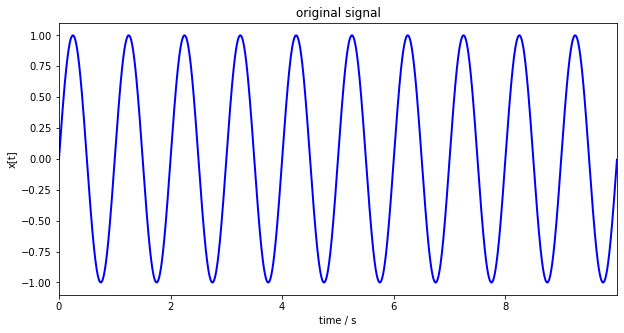

In [4]:
# plot the data
plt.figure(figsize=(10,5))
plt.plot(t_ax, x, c='b', lw=2)
plt.xlim(0, max(t_ax))
plt.xlabel("time / s")
plt.ylabel("x[t]")
plt.title("original signal")

In [5]:
# take the FFT
X = fft(x)
f_ax = fftfreq(len(x), 1/fs)
X = fftshift(X)
f_ax = fftshift(f_ax)

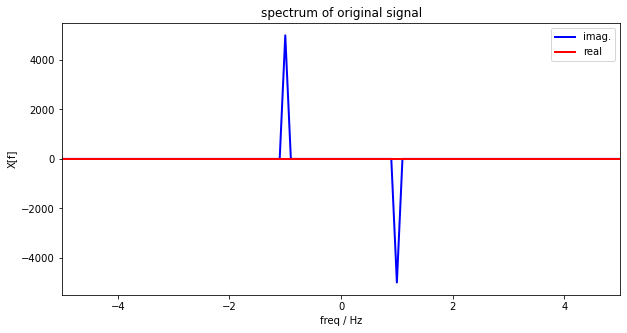

In [6]:
# look at the frequency spectrum of the original and transformed signals
plt.figure(figsize=(10,5))
plt.plot(f_ax, np.imag(X), c='b', lw=2, label="imag.")
plt.plot(f_ax, np.real(X), c='r', lw=2, label="real")
plt.xlim(-5,5)
plt.xlabel("freq / Hz")
plt.ylabel("X[f]")
plt.title("spectrum of original signal")
plt.legend()

## **Compute Hilbert transform using the SciPy implementation**

In [7]:
# compute analytical signal 
x_analytic = signal.hilbert(x)

In [8]:
# take FFT to view PSD of analytical signal
X_analytic = fft(x_analytic)
f_ax = fftfreq(len(x_analytic), 1/fs)
X_analytic = fftshift(X_analytic)
f_ax = fftshift(f_ax)

Text(0.5, 1.0, 'analytic signal')

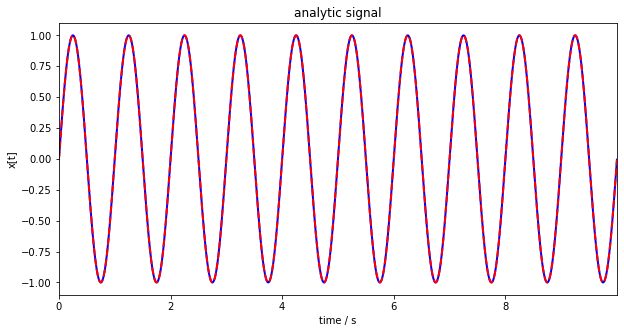

In [9]:
# plot the data
plt.figure(figsize=(10,5))
plt.plot(t_ax, np.real(x_analytic), c='b', lw=2, label="imag.")
plt.plot(t_ax, np.real(x_analytic), c='r', linestyle='--', lw=2, label="real")
plt.xlim(0, max(t_ax))
plt.xlabel("time / s")
plt.ylabel("x[t]")
plt.title("analytic signal")

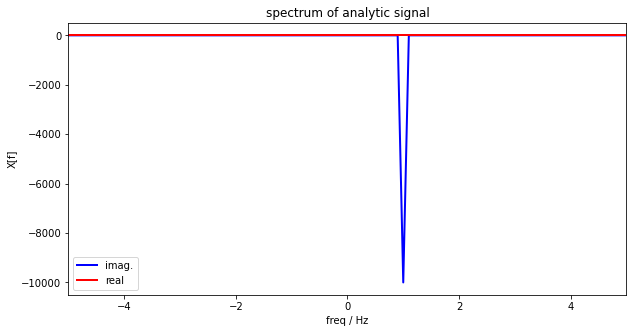

In [10]:
# look at the frequency spectrum of the original and transformed signals
plt.figure(figsize=(10,5))
plt.plot(f_ax, np.imag(X_analytic), c='b', lw=2, label="imag.")
plt.plot(f_ax, np.real(X_analytic), c='r', lw=2, label="real")
plt.xlim(-5,5)
plt.xlabel("freq / Hz")
plt.ylabel("X[f]")
plt.title("spectrum of analytic signal")
plt.legend()

## **Compute Hilbert transform using Fourier transforms**

In [11]:
# compute Hilbert transform through FFT (excluding 0 to avoid divide-by-zero error)
# get signal length
N = len(x)
# take forward FFT
FFT_x = fft(x)
# zero out negative frequency components
FFT_x[N//2+1:] = 0
# double FFT energy except at zero
FFT_x[1:N//2] = 2 * FFT_x[1:N//2]
# take inverse FFT
hilbert = ifft(FFT_x)
x_analytic_ft = x + 1j * np.imag(hilbert)

In [12]:
# take FFT to view PSD of analytical signal
X_analytic_ft = fft(x_analytic_ft)
f_ax = fftfreq(len(x_analytic_ft), 1/fs)
X_analytic_ft = fftshift(X_analytic_ft)
f_ax = fftshift(f_ax)

Text(0.5, 1.0, 'analytic signal')

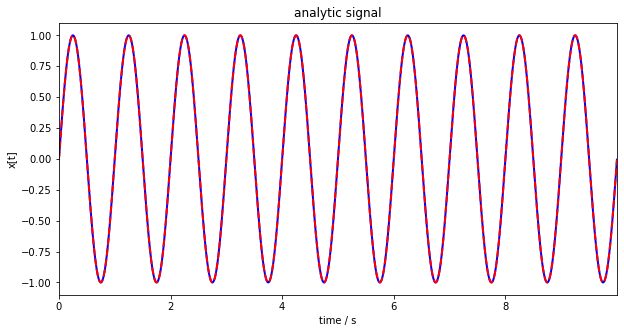

In [13]:
# plot the data
plt.figure(figsize=(10,5))
plt.plot(t_ax, np.real(x_analytic_ft), c='b', lw=2, label="imag.")
plt.plot(t_ax, np.real(x_analytic_ft), c='r', linestyle='--', lw=2, label="real")
plt.xlim(0, max(t_ax))
plt.xlabel("time / s")
plt.ylabel("x[t]")
plt.title("analytic signal")

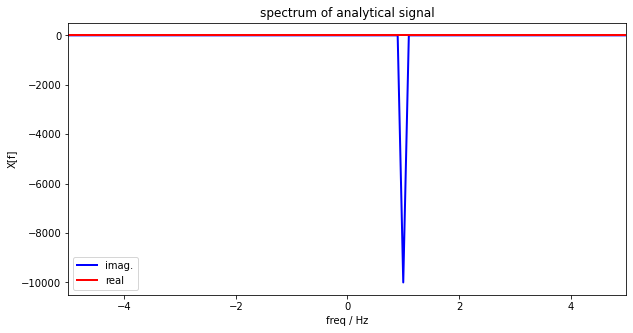

In [14]:
# look at the frequency spectrum of the original and transformed signals
plt.figure(figsize=(10,5))
plt.plot(f_ax, np.imag(X_analytic_ft), c='b', lw=2, label="imag.")
plt.plot(f_ax, np.real(X_analytic_ft), c='r', lw=2, label="real")
plt.xlim(-5,5)
plt.xlabel("freq / Hz")
plt.ylabel("X[f]")
plt.title("spectrum of analytical signal")
plt.legend()

## **Instantaneous phase and frequency**

In [15]:
amplitude_envelope = np.abs(x_analytic)
instantaneous_phase = np.unwrap(np.angle(x_analytic))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2 * np.pi) * fs)

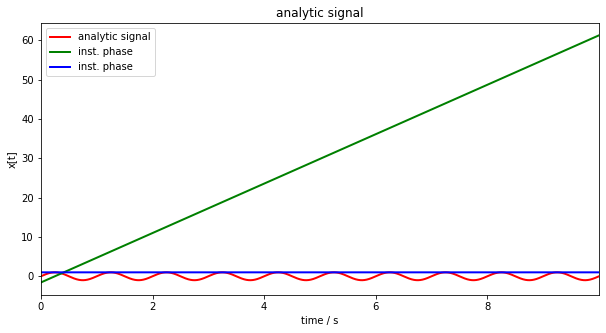

In [16]:
# plot the data
plt.figure(figsize=(10,5))
plt.plot(t_ax, np.real(x_analytic), c='r', lw=2, label="analytic signal")
plt.plot(t_ax, instantaneous_phase, c='g', lw=2, label="inst. phase")
plt.plot(t_ax[1:], instantaneous_frequency, c='b', lw=2, label="inst. phase")
plt.xlim(0, max(t_ax))
plt.xlabel("time / s")
plt.ylabel("x[t]")
plt.title("analytic signal")
plt.legend()